# Vehicle Image Classification Model (Neural Network)

In [151]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from joblib import dump

In [3]:
%matplotlib inline

In [4]:
label_encoder = LabelEncoder()

### Functions

In [5]:
# a function to view an image from a numpy array using matplotlib
def viewImg(arr,index):
    plt.matshow(arr[index], cmap = plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
    plt.show()

In [6]:
# a function to reshape a 4 dimensional(4D) numpy array to a 2 dimensional(2D) one
def reshape(arr):
    num_samples = arr.shape[0]  # Number of samples
    image_height = arr.shape[1]  # Height of the image
    image_width = arr.shape[2]  # Width of the image
    num_channels = arr.shape[3]  # Number of channels (e.g., 3 for RGB)
    return arr.reshape(num_samples, image_height * image_width * num_channels)

In [7]:
# a function to get the data of resized images(numpy arrays) using the name of the directory
def getData(dataset_dir, width, height):
    X = []
    y = []
    
    for folder in os.listdir(dataset_dir):
        folder_path = os.path.join(dataset_dir, folder)
        if not os.path.isdir(folder_path):
            continue

        label = folder

        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            if not os.path.isfile(file_path):
                continue

            img = cv2.imread(file_path)
            img = cv2.resize(img, (width, height))

            X.append(img)
            y.append(label)
            
    return np.array(X), y

## Collecting and processing data(training and testing)

In [94]:
X_train, y_train = getData("data/train", 50, 50)#collecting the training data
X_test, y_test = getData("data/test", 50, 50)#collecting the testing data

In [95]:
#processing the training data
X_train_reshaped = reshape(X_train)
y_train_encoded = label_encoder.fit_transform(y_train)

#processing the testing data
X_test_reshaped = reshape(X_test)
y_test_encoded = label_encoder.fit_transform(y_test)

### Viewing the data

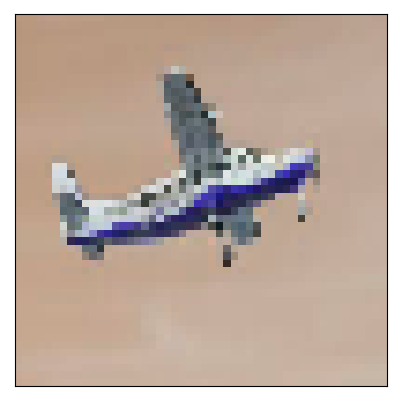

In [96]:
viewImg(X_train,323)

In [97]:
y_train[323]

'plane'

## Training the model

In [159]:
model = MLPClassifier(solver = "adam", activation = "relu", hidden_layer_sizes = (256, 256, 256), max_iter = 1000)

In [160]:
model.fit(X_train_reshaped, y_train_encoded)

MLPClassifier(hidden_layer_sizes=(256, 256, 256), max_iter=1000)

## Evaluating the model 

In [161]:
model.score(X_test_reshaped,y_test_encoded)#Printing the score of the model using the test data(I know its too low)

0.3888888888888889

### Testing using an image(multiple times)

In [175]:
model.predict([X_test_reshaped[15]])#predicting the output

array([1], dtype=int32)

In [177]:
label_encoder.inverse_transform([1])#decoding the endoded predicted output of the model

array(['boat'], dtype='<U10')

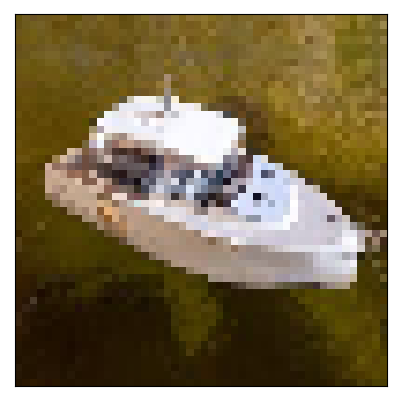

In [176]:
viewImg(X_test, 15)

In [162]:
dump(model, "savedModel.pkl")

['savedModel.pkl']